In [17]:
import importlib
import lab2
import copy
import numpy as np
from cv2 import imread, imwrite, hconcat, resize
import time

#from diffusion import take_params, get_probs, fill_graph_edges, diffusion_alg, labeling
# importlib.reload(lab2)

Read the image as float array, rescale it and set the parameters:

In [18]:
filename = "field1.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)

Zero iteration:

- take parameters of normal distribution from sky and ground on image;
- create an array of probabilities of class 0 and class 1 for each pixel;
- create start graph with edges depends on epsilon and probabilities;

In [19]:
start_time = time.time()

mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)

zero_iter_time = time.time() - start_time
print("Zero iteration time:  %s seconds; " % zero_iter_time)

Zero iteration time:  1.0778968334197998 seconds; 


Some start graph edges:

In [20]:
print(graph[5, 2] , "\n")
print(graph[-2, -5])

[-12.13507905 -28.28838848 -28.28838848 -48.83614705] 

[-1126.95625307  -579.15125413  -563.42932746   -20.01877768]


Diffusion algorithm:

In [21]:
start_time = time.time()

new_graph = lab2.diffusion_alg(n_iterations, graph)

alg_time = time.time() - start_time
print("Diffusion time: %s seconds;" % alg_time)
print("time per diffusion iteration: ", alg_time / n_iterations)

Diffusion time: 4.483041048049927 seconds;
time per diffusion iteration:  0.044830410480499266


Same edges after diffusion:

In [22]:
print(new_graph[5, 2])
print(new_graph[-2, -5])
# np.savetxt('0.txt', new_graph[500:540,:30,0],fmt='%.3f', delimiter='\t')
# np.savetxt('1.txt', new_graph[500:540,:30,1],fmt='%.3f',  delimiter='\t')
# np.savetxt('2.txt', new_graph[500:540,:30,2],fmt='%.3f',  delimiter='\t')
# np.savetxt('3.txt', new_graph[500:540,:30,3],fmt='%.3f',  delimiter='\t')


[-11.52968194 -28.10781473 -28.1370392  -48.79100362]
[-5.63528357e+02 -5.59132476e+02 -1.43103378e-03 -2.84410338e-10]


Now we need to pick labeling for graph:

In [23]:
start_time = time.time()

graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)

alg_time = time.time() - start_time
print("Labeling time: %s seconds;" % alg_time)
# print("time per Labeling iteration: ", alg_time / n_iterations)

labeling...
Start epsilon:  2357.149073079953
For epsilon =  1178.5745365399764 : looking...
For epsilon =  589.2872682699882 : looking...
For epsilon =  294.6436341349941 : looking...
For epsilon =  147.32181706749705 : looking...
For epsilon =  73.66090853374853 : looking...
For epsilon =  36.83045426687426 : looking...
For epsilon =  18.41522713343713 : looking...
For epsilon =  9.207613566718566 : looking...
For epsilon =  4.603806783359283 : looking...
For epsilon =  2.3019033916796414 : looking...
For epsilon =  1.1509516958398207 : looking...
For epsilon =  0.5754758479199104 : looking...
For epsilon =  0.2877379239599552 : looking...
For epsilon =  0.1438689619799776 : looking...
For epsilon =  0.0719344809899888 : looking...
For epsilon =  0.0359672404949944 : looking...
For epsilon =  0.0179836202474972 : looking...
For epsilon =  0.0089918101237486 : looking...
For epsilon =  0.0044959050618743 : looking...
For epsilon =  0.00224795253093715 : looking...
For epsilon =  0.001

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]]


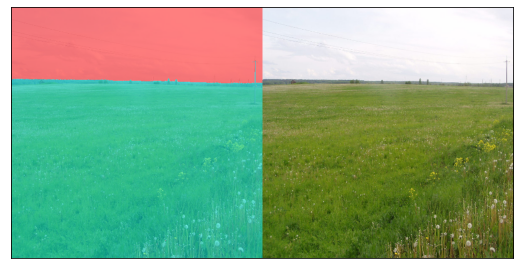

True

In [24]:
print(final_labels)

result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  6402.636057047785
For epsilon =  3201.3180285238923 : looking...
For epsilon =  1600.6590142619461 : looking...
For epsilon =  800.3295071309731 : looking...
For epsilon =  400.16475356548654 : looking...
For epsilon =  200.08237678274327 : looking...
For epsilon =  100.04118839137163 : looking...
For epsilon =  50.02059419568582 : looking...
For epsilon =  25.01029709784291 : looking...
For epsilon =  12.505148548921454 : looking...
For epsilon =  6.252574274460727 : looking...
For epsilon =  3.1262871372303636 : looking...
For epsilon =  1.5631435686151818 : looking...
Final labeling founded;
 Final epsilon =  1.5631435686151818


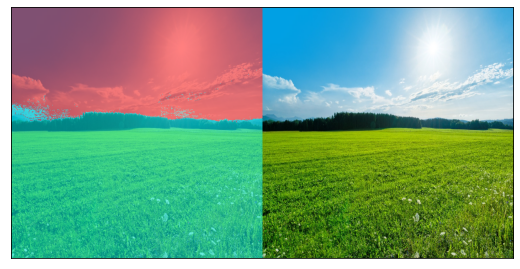

True

In [25]:
filename = "field2.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  2105.458159883376
For epsilon =  1052.729079941688 : looking...
For epsilon =  526.364539970844 : looking...
For epsilon =  263.182269985422 : looking...
For epsilon =  131.591134992711 : looking...
For epsilon =  65.7955674963555 : looking...
For epsilon =  32.89778374817775 : looking...
For epsilon =  16.448891874088876 : looking...
For epsilon =  8.224445937044438 : looking...
For epsilon =  4.112222968522219 : looking...
For epsilon =  2.0561114842611095 : looking...
For epsilon =  1.0280557421305547 : looking...
For epsilon =  0.5140278710652774 : looking...
For epsilon =  0.2570139355326387 : looking...
For epsilon =  0.12850696776631934 : looking...
For epsilon =  0.06425348388315967 : looking...
For epsilon =  0.032126741941579835 : looking...
For epsilon =  0.016063370970789918 : looking...
For epsilon =  0.008031685485394959 : looking...
For epsilon =  0.004015842742697479 : looking...
For epsilon =  0.0020079213713487397 : looking...
For epsilon =

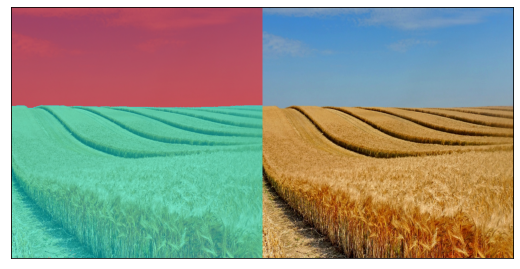

True

In [26]:
filename = "field3.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  1116.0684012410327
For epsilon =  558.0342006205163 : looking...
For epsilon =  279.0171003102582 : looking...
For epsilon =  139.5085501551291 : looking...
For epsilon =  69.75427507756454 : looking...
For epsilon =  34.87713753878227 : looking...
For epsilon =  17.438568769391136 : looking...
For epsilon =  8.719284384695568 : looking...
For epsilon =  4.359642192347784 : looking...
For epsilon =  2.179821096173892 : looking...
For epsilon =  1.089910548086946 : looking...
For epsilon =  0.544955274043473 : looking...
For epsilon =  0.2724776370217365 : looking...
For epsilon =  0.13623881851086825 : looking...
For epsilon =  0.06811940925543412 : looking...
For epsilon =  0.03405970462771706 : looking...
For epsilon =  0.01702985231385853 : looking...
For epsilon =  0.008514926156929266 : looking...
For epsilon =  0.004257463078464633 : looking...
For epsilon =  0.0021287315392323164 : looking...
For epsilon =  0.0010643657696161582 : looking...
For epsil

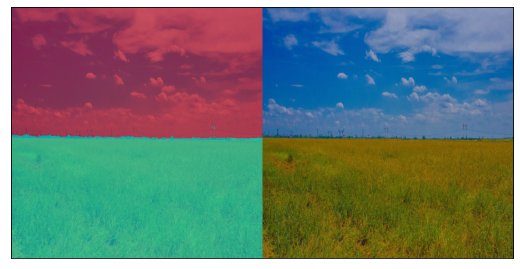

True

In [27]:
filename = "field4.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  117.93774570544274
For epsilon =  58.96887285272137 : looking...
For epsilon =  29.484436426360684 : looking...
For epsilon =  14.742218213180342 : looking...
For epsilon =  7.371109106590171 : looking...
For epsilon =  3.6855545532950855 : looking...
For epsilon =  1.8427772766475428 : looking...
Final labeling founded;
 Final epsilon =  1.8427772766475428


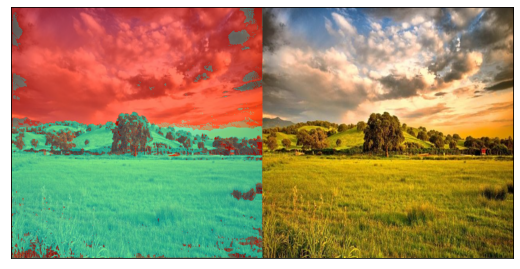

True

In [28]:
filename = "field5.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)

labeling...
Start epsilon:  350.9239193755649
For epsilon =  175.46195968778244 : looking...
For epsilon =  87.73097984389122 : looking...
For epsilon =  43.86548992194561 : looking...
For epsilon =  21.932744960972805 : looking...
For epsilon =  10.966372480486402 : looking...
For epsilon =  5.483186240243201 : looking...
For epsilon =  2.7415931201216006 : looking...
For epsilon =  1.3707965600608003 : looking...
For epsilon =  0.6853982800304002 : looking...
For epsilon =  0.3426991400152001 : looking...
For epsilon =  0.17134957000760004 : looking...
For epsilon =  0.08567478500380002 : looking...
For epsilon =  0.04283739250190001 : looking...
Final labeling founded;
 Final epsilon =  0.04283739250190001


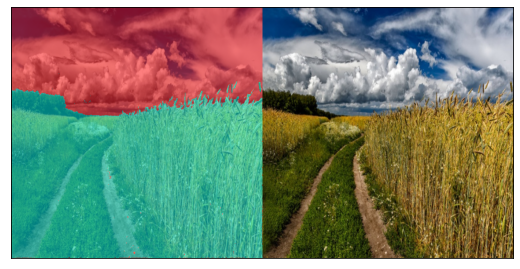

True

In [29]:
filename = "field6.jpg"
img1 = imread(filename)
scale = [512, 512]
img1_res = resize(img1, scale).astype(np.longdouble)
n_iterations = 100
eps = 0.2
epsilon_lower_border=10**(-20)
mean0, mean1, cov0, cov1 = lab2.take_params(img1_res, h=.2, w=.4, offset=0.05)
PROBS = lab2.get_probs(img1_res, mean0, mean1, cov0, cov1)
graph = lab2.fill_graph_edges(PROBS)
new_graph = lab2.diffusion_alg(n_iterations, graph)
graph_for_label = copy.deepcopy(new_graph)
labeling_graph, final_labels = lab2.labeling(graph_for_label, epsilon_lower_border=epsilon_lower_border)
result = np.zeros_like(img1_res)
result[..., 0] = final_labels * 255
result[..., 1] = final_labels * 255
result[result[..., 0] == 0] = [0, 0, 255]
result[result[..., 1] == 0] = [0, 0, 255]
result2 = hconcat([(img1_res/2 + result /2).astype(np.uint8), img1_res.astype(np.uint8)])
lab2.show_image(result2)
imwrite('result_' + filename[:-4] + '.png', result2)